In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow
import cv2
import os
import PIL

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip '/content/gdrive/MyDrive/Colab Notebooks/Lungcancerdataset.zip' -d '/content/gdrive/MyDrive/Colab Notebooks/'

Archive:  /content/gdrive/MyDrive/Colab Notebooks/Lungcancerdataset.zip
replace /content/gdrive/MyDrive/Colab Notebooks/Data/test/adenocarcinoma/000108 (3).png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
test_dataset = cv2.imread('/content/gdrive/MyDrive/Colab Notebooks/Data/test/adenocarcinoma/000108 (3).png')

In [ ]:
type(test_dataset)

numpy.ndarray

In [ ]:
test_dataset.shape

(282, 381, 3)

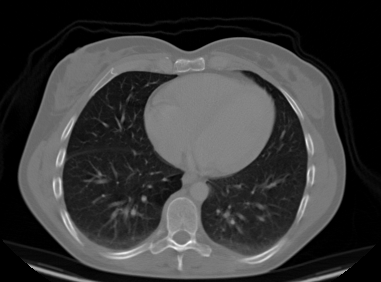

In [ ]:
cv2_imshow(test_dataset)

In [ ]:
test_dataset_resize = cv2.resize(test_dataset, (256, 256))

In [ ]:
test_dataset_resize.shape

(256, 256, 3)

In [ ]:
test_dataset_resize_scaled = test_dataset_resize/256

In [ ]:
file_names = os.listdir('/content/gdrive/MyDrive/Colab Notebooks/Data/train')

In [ ]:
file_names

['adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib',
 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa',
 'normal',
 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa']

In [ ]:
adenocarcinoma = os.listdir('/content/gdrive/MyDrive/Colab Notebooks/Data/train/large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa')

In [ ]:
len(adenocarcinoma)

115

In [ ]:
file_names_val = os.listdir('/content/gdrive/MyDrive/Colab Notebooks/Data/valid')

In [ ]:
file_names_val

['adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib',
 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa',
 'normal',
 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa']

In [ ]:
data_set = []
labels = []

for i in file_names:
  df1 = os.listdir('/content/gdrive/MyDrive/Colab Notebooks/Data/train/' + str(i))
  df2 = os.listdir('/content/gdrive/MyDrive/Colab Notebooks/Data/valid/' + str(i))

  data_set.append(df1)
  data_set.append(df2)

In [ ]:
len(data_set)

8

In [ ]:
data_set = []
labels = []

for i in file_names:

  l1 = str(i)
  df1 = os.listdir('/content/gdrive/MyDrive/Colab Notebooks/Data/train/' + str(i))
  df2 = os.listdir('/content/gdrive/MyDrive/Colab Notebooks/Data/valid/' + str(i))

  for j in range(len(df1)):

    data_set.append('/content/gdrive/MyDrive/Colab Notebooks/Data/train/' + str(i) + '/' + df1[j])
    labels.append(l1[0])

  for k in range(len(df2)):

    data_set.append('/content/gdrive/MyDrive/Colab Notebooks/Data/valid/' + str(i) + '/' + df2[k])
    labels.append(l1[0])

In [ ]:
len(data_set)

685

In [ ]:
len(labels)

685

In [ ]:
file_names_test = os.listdir('/content/gdrive/MyDrive/Colab Notebooks/Data/test')

In [ ]:
file_names_test

['adenocarcinoma', 'large.cell.carcinoma', 'normal', 'squamous.cell.carcinoma']

In [ ]:
data_set_test = []
labels_test = []

for i in file_names_test:

  l2 = str(i)
  df4 = os.listdir('/content/gdrive/MyDrive/Colab Notebooks/Data/test/' + str(i))

  for j in range(len(df4)):

    data_set_test.append('/content/gdrive/MyDrive/Colab Notebooks/Data/test/' + str(i) + '/' + df4[j])
    labels_test.append(l2[0])

In [ ]:
len(data_set_test)

315

In [ ]:
len(labels_test)

315

In [ ]:
joined_photos_path = data_set + data_set_test
joined_labels = labels + labels_test

In [ ]:
len(joined_photos_path)

1000

In [ ]:
len(joined_labels)

1000

In [ ]:
joined_photos_path_final = []

for i in range(len(joined_photos_path)):
  input_image_path = cv2.imread(joined_photos_path[i])
  input_image_path_resized = cv2.resize(input_image_path, (224,224))
  input_image_path_resized_scaled = input_image_path_resized/224

  joined_photos_path_final.append(input_image_path_resized_scaled)

In [ ]:
len(joined_photos_path_final)

1000

In [ ]:
type(joined_photos_path_final)

list

In [ ]:
type(joined_photos_path_final[0])

numpy.ndarray

In [ ]:
joined_photos_path_final[0].shape

(224, 224, 3)

In [ ]:
joined_photos_path_final_array = np.asarray(joined_photos_path_final)

In [ ]:
type(joined_photos_path_final_array)

numpy.ndarray

In [ ]:
len(joined_photos_path_final_array)

1000

In [ ]:
joined_photos_path_final_array.shape

(1000, 224, 224, 3)

In [ ]:
joined_labels_encoded = []

for i in range(len(joined_labels)):
    if joined_labels[i] == 'a':
        joined_labels_encoded.append(0)
    elif joined_labels[i] == 'l':
        joined_labels_encoded.append(1)
    elif joined_labels[i] == 'n':
        joined_labels_encoded.append(2)
    elif joined_labels[i] == 's':
        joined_labels_encoded.append(3)

In [ ]:
joined_labels_encoded_array = np.asarray(joined_labels_encoded)

In [ ]:
type(joined_labels_encoded_array)

numpy.ndarray

In [ ]:
len(joined_labels_encoded_array)

1000

In [ ]:
joined_labels_encoded_array.shape

(1000,)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(joined_photos_path_final_array, joined_labels_encoded_array, test_size = 0.2, random_state = 2, stratify = joined_labels_encoded_array)

In [ ]:
len(X_train),len(X_test),len(Y_train),len(Y_test)

(800, 200, 800, 200)

In [ ]:
from collections import Counter

count_Y_train = Counter(Y_train)
count_Y_test = Counter(Y_test)

In [ ]:
count_Y_train, count_Y_test

(Counter({1: 150, 0: 270, 3: 208, 2: 172}),
 Counter({2: 43, 1: 37, 3: 52, 0: 68}))

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [ ]:
num_of_classes = 4

model = tf.keras.Sequential([

    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 4)                 5124      
                                                                 
Total params: 2,263,108
Trainable params: 5,124
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [ ]:
model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
25/25 [==============================] - 31s 1s/step - loss: 0.4269 - acc: 0.8813
Epoch 2/10
25/25 [==============================] - 31s 1s/step - loss: 0.3939 - acc: 0.8938
Epoch 3/10
25/25 [==============================] - 30s 1s/step - loss: 0.3629 - acc: 0.9112
Epoch 4/10
25/25 [==============================] - 32s 1s/step - loss: 0.3301 - acc: 0.9225
Epoch 5/10
25/25 [==============================] - 35s 1s/step - loss: 0.2958 - acc: 0.9375
Epoch 6/10
25/25 [==============================] - 33s 1s/step - loss: 0.2780 - acc: 0.9413
Epoch 7/10
25/25 [==============================] - 32s 1s/step - loss: 0.2631 - acc: 0.9475
Epoch 8/10
25/25 [==============================] - 34s 1s/step - loss: 0.2415 - acc: 0.9563
Epoch 9/10
25/25 [==============================] - 31s 1s/step - loss: 0.2253 - acc: 0.9688
Epoch 10/10
25/25 [==============================] - 31s 1s/step - loss: 0.2130 - acc: 0.9675


In [ ]:
score, acc = model.evaluate(X_test, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

7/7 [==============================] - 9s 1s/step - loss: 0.3692 - acc: 0.8950
Test Loss = 0.36921489238739014
Test Accuracy = 0.8949999809265137


Path of the image to be predicted: /content/3-Figure3.2-1.png


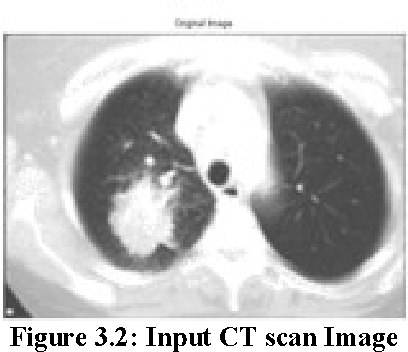

1/1 [==============================] - 0s 66ms/step
Use have Adenocarcinoma Cancer


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/224

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

if input_pred_label == 0:
  print('Use have Adenocarcinoma Cancer')

elif input_pred_label == 1:
  print('Use have Large Cell Carcinoma Cancer')

elif input_pred_label == 2:
  print('Dont worry, you are Cancer free')

elif input_pred_label == 3:
  print('Use have Squamous Cell Carcinoma Cancer')

In [ ]:
import pickle

In [ ]:
filename_model = 'lung_cancer_detection.sav'
pickle.dump(model, open(filename_model, 'wb'))

In [ ]:
tf.keras.models.save_model(model,'my_model2.hdf5')

In [ ]:
!pip install streamlit

In [ ]:
%%writefile app.py


import streamlit as st
import tensorflow as tf
import streamlit as st

@st.cache(allow_output_mutation=True)

def load_model():

  model=tf.keras.models.load_model('/content/my_model2.hdf5')
  return model

with st.spinner('Model is being loaded..'):
  model=load_model()

st.write("""
         # Lung Cancer Detection
         """
         )


file = st.file_uploader("Please upload the Lung CT scan", type=["jpg", "png"])

import cv2
from PIL import Image, ImageOps
import numpy as np

st.set_option('deprecation.showfileUploaderEncoding', False)

def import_and_predict(image_data, model):

  input_image = cv2.imread(image_data)

  input_image_resize = cv2.resize(input_image, (224,224))

  input_image_scaled = input_image_resize/224

  image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

  input_prediction = model.predict(image_reshaped)

  input_pred_label = np.argmax(input_prediction)

  if input_pred_label == 0:
    prediction = 'Use have Adenocarcinoma Cancer'

  elif input_pred_label == 1:
    prediction = 'Use have Large Cell Carcinoma Cancer'

  elif input_pred_label == 2:
    prediction = 'Dont worry, you are Cancer free'

  elif input_pred_label == 3:
    prediction = 'Use have Squamous Cell Carcinoma Cancer'

  return prediction

if file is None:

    st.text("Please upload an image file")

else:

    image = Image.open(file)
    st.image(image, use_column_width=True)
    predictions = import_and_predict(image, model)
    st.write(prediction)

    print(
    "Diagnosis {}"
    .format(prediction)
)


Overwriting app.py


In [ ]:
!pip install pyngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!ngrok authtoken 2O7nEWbOQZ42F0ZjoFvQfYkBPGf_6oiqkkemy5QKwYN7D5ZJG

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
!nohup streamlit run app.py &

nohup: appending output to 'nohup.out'


In [ ]:
from pyngrok import ngrok
url=ngrok.connect(port=8501)
url

<NgrokTunnel: "http://e259-35-224-98-121.ngrok-free.app" -> "http://localhost:80">

In [ ]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip

--2023-04-08 02:32:53--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 54.161.241.46, 18.205.222.128, 52.202.168.65, ...
Connecting to bin.equinox.io (bin.equinox.io)|54.161.241.46|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13921656 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.28M  36.3MB/s    in 0.4s    

2023-04-08 02:32:54 (36.3 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13921656/13921656]



In [ ]:
!unzip ngrok-stable-linux-amd64.zip

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [ ]:
get_ipython().system_raw('./ngrok http 8501 &')

In [ ]:
!curl -s http://localhost:4040/api/tunnels | python3 -c \
    'import sys, json; print("Execute the next cell and the go to the following URL: " +json.load(sys.stdin)["tunnels"][0]["public_url"])'

Execute the next cell and the go to the following URL: https://bc24-35-224-98-121.ngrok-free.app


In [ ]:
!streamlit run /content/app.py




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8503
  External URL: http://35.224.98.121:8503



  Stopping...
  Stopping...
Error in atexit._run_exitfuncs:
Traceback (most recent call last):
  File "/usr/lib/python3.9/logging/__init__.py", line 2126, in shutdown
    def shutdown(handlerList=_handlerList):
  File "/usr/local/lib/python3.9/dist-packages/streamlit/web/bootstrap.py", line 69, in signal_handler
    server.stop()
  File "/usr/local/lib/python3.9/dist-packages/streamlit/web/server/server.py", line 401, in stop
    self._runtime.stop()
  File "/usr/local/lib/python3.9/dist-packages/streamlit/runtime/runtime.py", line 322, in stop
    async_objs.eventloop.call_soon_threadsafe(stop_on_eventloop)
  File "/usr/lib/python3.9/asyncio/base_events.py", line 796, in call_soon_threadsafe
    self._check_closed()
  File "/usr/lib/python3.9/asyncio/base_events.py", line 515, in _check_closed
    raise RuntimeError('Event loop is closed')
RuntimeError: Event loop is closed
